# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [3]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [25]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [5]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[["city","country"]]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [7]:
# Q2: how to get the first 5 rows of the "city" column?
df['city'].head()

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [12]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [13]:
# Q4: how to use .loc to select the first row in "country" column?
df['country'].loc[0]

'United Kingdom'

In [18]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[0:3,'date':'city']

,date,city
0,05/14/2014 09:07,West Drayton
1,05/14/2014 09:22,Hounslow
2,05/14/2014 10:51,Hounslow
3,05/14/2014 11:24,Hounslow


### Using .iloc[ ]

In [19]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[2,1]

-0.446081

In [22]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[0::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [4]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [6]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['whether equal to Munich'] = df['city'].eq("Munich")
df.tail()

,lat,lon,date,city,country,whether equal to Munich
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


In [10]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
df[(df.country=='Spain')&(df.city!='Barcelona')]

,lat,lon,date,city,country,whether equal to Munich
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain,False
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain,False
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain,False
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain,False
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain,False
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain,False


In [11]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df.country=='Serbia')|(df.city!='Munich')]

,lat,lon,date,city,country,whether equal to Munich
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal,False
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal,False
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal,False
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal,False
...,...,...,...,...,...,...
172,41.015594,28.962900,07/08/2014 11:45,Istanbul,Turkey,False
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False


In [14]:
# Q12: how many observations are west of the prime meridian?
df[df.lon<0]

,lat,lon,date,city,country,whether equal to Munich
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal,False
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal,False
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal,False
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal,False
5,38.723108,-9.113374,05/15/2014 11:34,Lisbon,Portugal,False
6,38.691944,-9.215561,05/15/2014 14:50,Lisbon,Portugal,False
7,38.708487,-9.136022,05/15/2014 16:49,Lisbon,Portugal,False
8,38.797558,-9.341000,05/16/2014 10:58,Algueirão-Mem Martins,Portugal,False
9,38.801171,-9.425103,05/16/2014 13:43,Sintra,Portugal,False


In [13]:
# Q13: get all rows that contain a city that starts with the letter G
df[df.city.str.startswith('G')]

,lat,lon,date,city,country,whether equal to Munich
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


In [18]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
df['city'].value_counts()
df['country'].value_counts()
df.isnull()

,lat,lon,date,city,country,whether equal to Munich
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
173,False,False,False,False,False,False
174,False,False,False,False,False,False
175,False,False,False,False,False,False
176,False,False,False,False,False,False


In [31]:
# Q15: group by country name and show the city names in each of the country
df1 = df[['country','city']]
a = df1.groupby('country')
for i in a:
    print(i)

('Albania',      country         city
151  Albania        Berat
152  Albania  Gjirokastër)
('Bosnia and Herzegovina',                     country      city
142  Bosnia and Herzegovina  Sarajevo
143  Bosnia and Herzegovina  Sarajevo
144  Bosnia and Herzegovina    Mostar)
('Croatia',      country       city
145  Croatia      Ploče
146  Croatia      Split
147  Croatia  Dubrovnik)
('Czech Republic',            country                              city
65  Czech Republic                      Novy Bohumin
66  Czech Republic                           Hranice
67  Czech Republic                            Prerov
68  Czech Republic                   Ústí nad Orlicí
69  Czech Republic                            Kojice
70  Czech Republic                            Sadská
71  Czech Republic                            Prague
72  Czech Republic                            Prague
73  Czech Republic                            Prague
74  Czech Republic                            Prague
75  Czech Republic

## Part 3 <br /> How to select based on a date-time values

In [40]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [50]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

True

In [51]:
# Q17: drop duplicate index 
dt = dt[~dt.index.duplicated()]

In [61]:
# Q18: create a weekday and a weekend dataframe
dt['Day of Week'] = dt.index.day_name()
dt['Weekend or not'] = dt['Day of Week'].isin(['Saturday','Sunday'])
dt.iloc[0::50]

,lat,lon,city,country,Day of Week,Weekend or not
date,,,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom,Wednesday,False
2014-05-15 07:35:00,38.711842,-9.137306,Lisbon,Portugal,Thursday,False
2014-05-16 01:48:00,38.711834,-9.137267,Lisbon,Portugal,Friday,False
2014-05-16 22:39:00,38.710664,-9.142607,Lisbon,Portugal,Friday,False
2014-05-17 18:43:00,41.138315,-8.613814,Vila Nova de Gaia Municipality,Portugal,Saturday,True
2014-05-18 15:42:00,41.140082,-8.615218,Porto,Portugal,Sunday,True
2014-05-20 03:18:00,41.377091,2.151175,Barcelona,Spain,Tuesday,False
2014-05-21 16:55:00,41.375179,2.149651,Barcelona,Spain,Wednesday,False
2014-05-23 14:43:00,41.392034,2.161520,Barcelona,Spain,Friday,False


<AxesSubplot:>

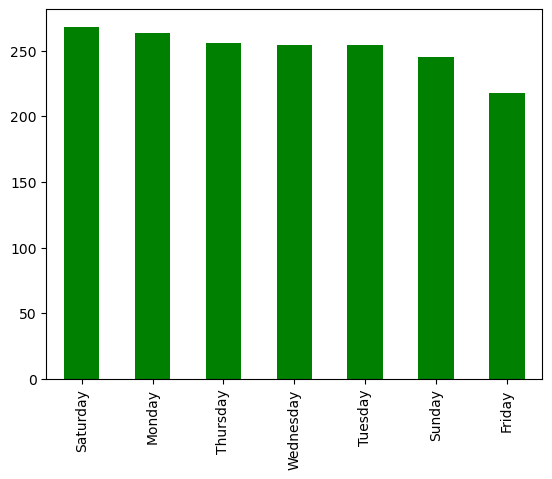

In [68]:
# Q19: calculate and plot the number of observations each day of the week has
a = dt['Day of Week'].value_counts()
a.plot(kind="bar", color='green')